In [74]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Dropout, Cropping2D, Input, Concatenate, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
from tensorflow.keras import backend as K  # want the Keras modules to be compatible
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [10]:
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [11]:
train_images.shape

(60000, 28, 28)

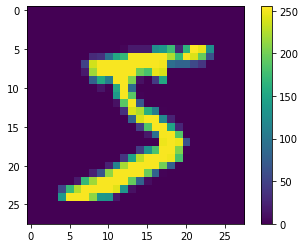

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

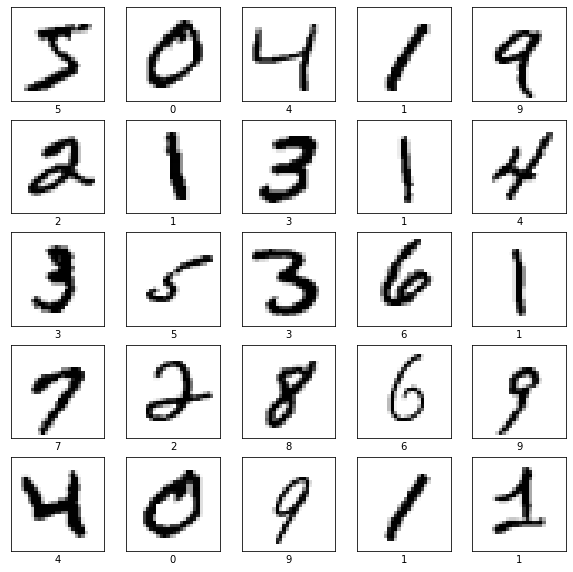

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [77]:
def CNN(activation='relu', kernel_initializer='glorot_uniform', padding= 'same'):
    inputs = Input((28, 28 ,1))
    conv1 = Conv2D(32,(3,3),activation='relu',padding= 'same')(inputs)
    conv2 = Conv2D(64,(3,3),activation='relu',padding= 'same')(conv1)
    pool1 = MaxPooling2D((2,2),strides = 2)(conv2)
    drop1 = Dropout(0.25)(pool1)
    flatten = Flatten()(drop1)
    fc1 = Dense(128,activation='relu')(flatten)
    drop2 = Dropout(0.5)(fc1)
    outputs = Dense(10,activation='softmax')(drop2)
    print(outputs.shape)
    model = Model(inputs=inputs,outputs=outputs,name='CNN')
    
    model.compile(optimizer=Adadelta(lr=1),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [78]:
cnn_config = {
    "activation" : "relu", 
    "kernel_initializer" : "glorot_uniform", 
    "padding" : 'same'
}

training_config = {
    "batch_size": 16, # 学習時のBatchsize
    "epochs": 14 # 学習時のEpoch数
}

In [79]:
model = CNN(
    activation=cnn_config['activation'],
    kernel_initializer=cnn_config['kernel_initializer'],
    padding=cnn_config['padding']
)

(None, 10)


In [80]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1605760 

In [75]:
train_one_hot = to_categorical(train_labels, 10)
test_one_hot = to_categorical(test_labels, 10)

In [83]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=14,verbose=1,  validation_split=0.2)

Epoch 1/14
750/750 [==============================] - 42s 56ms/step - loss: 0.1105 - accuracy: 0.9746 - val_loss: 0.0813 - val_accuracy: 0.9795
Epoch 2/14
750/750 [==============================] - 42s 56ms/step - loss: 0.0999 - accuracy: 0.9773 - val_loss: 0.0663 - val_accuracy: 0.9852
Epoch 3/14
750/750 [==============================] - 42s 56ms/step - loss: 0.0930 - accuracy: 0.9784 - val_loss: 0.0656 - val_accuracy: 0.9852
Epoch 4/14
750/750 [==============================] - 42s 56ms/step - loss: 0.0925 - accuracy: 0.9786 - val_loss: 0.0793 - val_accuracy: 0.9851
Epoch 5/14
750/750 [==============================] - 43s 57ms/step - loss: 0.0911 - accuracy: 0.9795 - val_loss: 0.0696 - val_accuracy: 0.9825
Epoch 6/14
750/750 [==============================] - 45s 61ms/step - loss: 0.0820 - accuracy: 0.9816 - val_loss: 0.0667 - val_accuracy: 0.9862
Epoch 7/14
750/750 [==============================] - 45s 60ms/step - loss: 0.0819 - accuracy: 0.9821 - val_loss: 0.0849 - val_accuracy:

In [84]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0737 - accuracy: 0.9845

Test accuracy: 0.984499990940094
